# Integrantes Sala 7
- Juan Nicolás Pinilla Morales
- Melesio Reyes Perez
- Daniel Herrera Caballero
- Juan David de la Cruz Martinez
- Guillermo Jair Montiel Juárez


# PROYECTO 1. La heladería de Don Rutilio

Don Rutilio es el orgulloso dueño de una heladería artesanal que, durante los últimos cinco años, ha conquistado corazones (y paladares) con sus sabores únicos y caseros. A lo largo de este tiempo, ha recibido cientos de reseñas de clientes en Google Maps, Facebook y su sitio web. Aunque valora profundamente cada comentario, confiesa que leerlos uno por uno sería una tarea interminable.

Por suerte, su sobrino(a) —recién egresado del programa MeIA— le compartió una gran idea: usar esas reseñas como una mina de oro de información. En lugar de leerlas manualmente, le propuso crear una herramienta que analice automáticamente los comentarios para descubrir:

- Qué sabores generan más alegrías.
- Cuáles provocan desagrados.
- Cómo ha evolucionado la percepción de su servicio en el tiempo.

Con entusiasmo (y algo de curiosidad), Don Rutilio aceptó el reto. Así comienza esta dulce aventura tecnológica.

**Objetivo:**  
Que él pueda tomar mejores decisiones sobre sabores, promociones y atención al cliente **basándose en datos reales**.


In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# Importar y configurar nltk para obtener las stopwords en español
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:

# -------------------------------
# 1. Cargar y visualizar datos de entrenamiento desde "entrenamiento.csv"
# -------------------------------
# Se asume que el CSV tiene las columnas: sabor, opinion, etiqueta.
df_train = pd.read_csv("entrenamiento.csv", sep=",", encoding="latin-1")

# Mostrar las columnas originales para diagnóstico
print("Columnas originales en entrenamiento.csv:", df_train.columns.tolist())

# Limpiar nombres de columnas: se remueven espacios adicionales y columnas sin nombre
df_train.columns = df_train.columns.str.strip()
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]
print("Columnas limpias en entrenamiento.csv:", df_train.columns.tolist())
print("Datos de entrenamiento:")
print(df_train.head())

Columnas originales en entrenamiento.csv: ['sabor', 'opinion', 'etiqueta', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
Columnas limpias en entrenamiento.csv: ['sabor', 'opinion', 'etiqueta']
Datos de entrenamiento:
       sabor                                            opinion  etiqueta
0   vainilla  El helado de vainilla tenÃ­a un sabor profundo...         1
1  chocolate  La textura del helado de chocolate era perfect...         1
2      fresa  El fresa fue mi favorito, su dulzura estaba mu...         1
3      mango  Definitivamente volverÃ© por mÃ¡s de la varied...         1
4   pistacho  El aroma y sabor del helado de pistacho me tra...         1


In [41]:
# -------------------------------
# 2. Preparar el set de entrenamiento y dividirlo en entrenamiento (80%) y prueba (20%)
# -------------------------------
if 'opinion' not in df_train.columns:
    raise KeyError("La columna 'opinion' no existe en el DataFrame de entrenamiento. Revisa el archivo CSV.")

X = df_train['opinion']
y = df_train['etiqueta']

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
# -------------------------------
# 3. Vectorización de texto usando TF-IDF
# -------------------------------
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# -------------------------------
# 4. Entrenamiento del modelo Naive Bayes
# -------------------------------
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()


Reporte de clasificación en el set de validación (20%):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



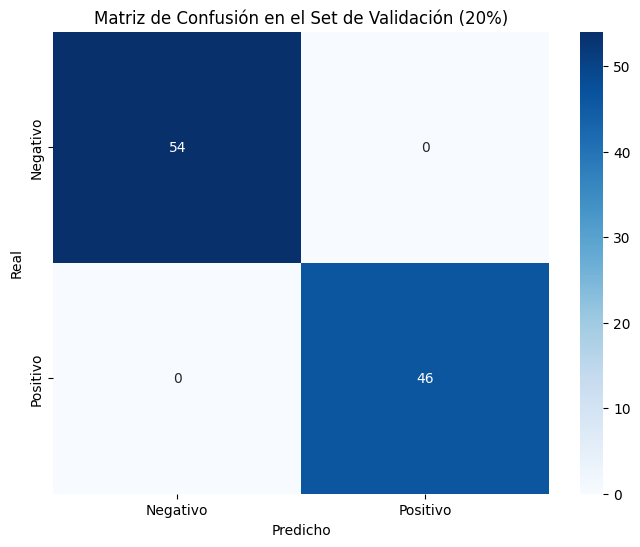

In [43]:
# -------------------------------
# 5. Evaluación del modelo en el set de validación
# -------------------------------
y_val_pred = model.predict(X_val_tfidf)
cm = confusion_matrix(y_val, y_val_pred)
print("\nReporte de clasificación en el set de validación (20%):")
print(classification_report(y_val, y_val_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión en el Set de Validación (20%)")
plt.show()

# Datos de Prueba

In [60]:
# -------------------------------
# 5. Cargar y procesar datos de prueba desde "pruebas.csv"
# -------------------------------
# Se asume que el CSV de prueba contiene las columnas: sabor y opinion (sin etiqueta)
df_test = pd.read_csv("pruebas2.csv", sep=",", encoding="latin-1")
print("\nColumnas originales en pruebas.csv:", df_test.columns.tolist())

df_test.columns = df_test.columns.str.strip()
df_test = df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]
print("Columnas limpias en pruebas.csv:", df_test.columns.tolist())
print("\nDatos de prueba:")
print(df_test.head())

# Convertir la columna 'fecha' a tipo datetime
df_test['fecha'] = pd.to_datetime(df_test['fecha'], format="%Y-%m-%d")


Columnas originales en pruebas.csv: ['sabor', 'opinion', 'fecha']
Columnas limpias en pruebas.csv: ['sabor', 'opinion', 'fecha']

Datos de prueba:
       sabor                            opinion       fecha
0   vainilla   Me encanta su suavidad y dulzura  2025-01-05
1    cafÃÂ©     Demasiado amargo para mi gusto  2025-01-12
2      fresa  Un clÃÂ¡sico siempre refrescante  2025-01-28
3  chocolate            El mejor sabor de todos  2025-02-04
4   limÃÂ³n      ÃÂcido pero muy refrescante  2025-02-10


In [61]:
# -------------------------------
# 6. Vectorización y predicción sobre datos de prueba
# -------------------------------
X_test = df_test['opinion']
X_test_tfidf = vectorizer.transform(X_test)
predicciones = model.predict(X_test_tfidf)
df_test['prediccion'] = predicciones

print("\nResultados de predicción en pruebas.csv:")
print(df_test)


Resultados de predicción en pruebas.csv:
        sabor                                      opinion      fecha  \
0    vainilla             Me encanta su suavidad y dulzura 2025-01-05   
1     cafÃÂ©               Demasiado amargo para mi gusto 2025-01-12   
2       fresa            Un clÃÂ¡sico siempre refrescante 2025-01-28   
3   chocolate                      El mejor sabor de todos 2025-02-04   
4    limÃÂ³n                ÃÂcido pero muy refrescante 2025-02-10   
5       menta  No me gusta la combinaciÃÂ³n con chocolate 2025-02-14   
6    caramelo                         Demasiado empalagoso 2025-02-27   
7        coco      Suave y delicioso me recuerda al verano 2025-03-03   
8        nuez                   Me gusta el toque crocante 2025-03-10   
9       mango                      Muy tropical me encanta 2025-03-17   
10      fresa                  Un poco artificial el sabor 2025-03-25   
11   vainilla                  Demasiado simple para mÃÂ­ 2025-04-01   
12  choco

In [62]:
# -------------------------------
# 7. Análisis de resultados: Ranking de sabores
# -------------------------------
# Se agrupa por "sabor" y se calcula el promedio de reseñas positivas (donde 1=positivo y 0=negativo)
ranking_sabores = df_test.groupby("sabor")["prediccion"].mean().reset_index()
ranking_sabores = ranking_sabores.sort_values(by="prediccion", ascending=False)

print("\nRanking de sabores por reseñas positivas:")
print(ranking_sabores)

if not ranking_sabores.empty:
    mejor_sabor = ranking_sabores.iloc[0]
    print(f"\nEl sabor mejor valorado es: {mejor_sabor['sabor']} con un promedio de {mejor_sabor['prediccion']*100:.2f}% de reseñas positivas.")



Ranking de sabores por reseñas positivas:
       sabor  prediccion
7      menta    1.000000
4      fresa    0.833333
9   vainilla    0.833333
8       nuez    0.800000
6      mango    0.800000
2  chocolate    0.800000
1   caramelo    0.600000
0    cafÃÂ©    0.600000
5   limÃÂ³n    0.600000
3       coco    0.500000

El sabor mejor valorado es: menta con un promedio de 100.00% de reseñas positivas.


<ipython-input-63-1659278916>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="prediccion", y="sabor", data=ranking_sabores, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


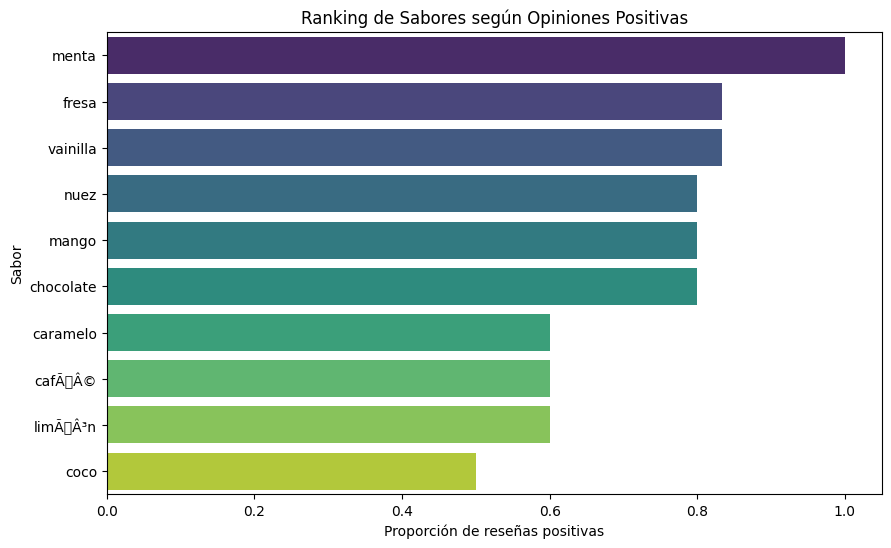

In [63]:
# -------------------------------
# 8. Graficar el ranking de sabores
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x="prediccion", y="sabor", data=ranking_sabores, palette="viridis")
plt.xlabel("Proporción de reseñas positivas")
plt.ylabel("Sabor")
plt.title("Ranking de Sabores según Opiniones Positivas")
plt.show()


Porcentaje de opiniones por sabor:
prediccion   Negativa    Positiva
sabor                            
cafÃÂ©     40.000000   60.000000
caramelo    40.000000   60.000000
chocolate   20.000000   80.000000
coco        50.000000   50.000000
fresa       16.666667   83.333333
limÃÂ³n    40.000000   60.000000
mango       20.000000   80.000000
menta        0.000000  100.000000
nuez        20.000000   80.000000
vainilla    16.666667   83.333333


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


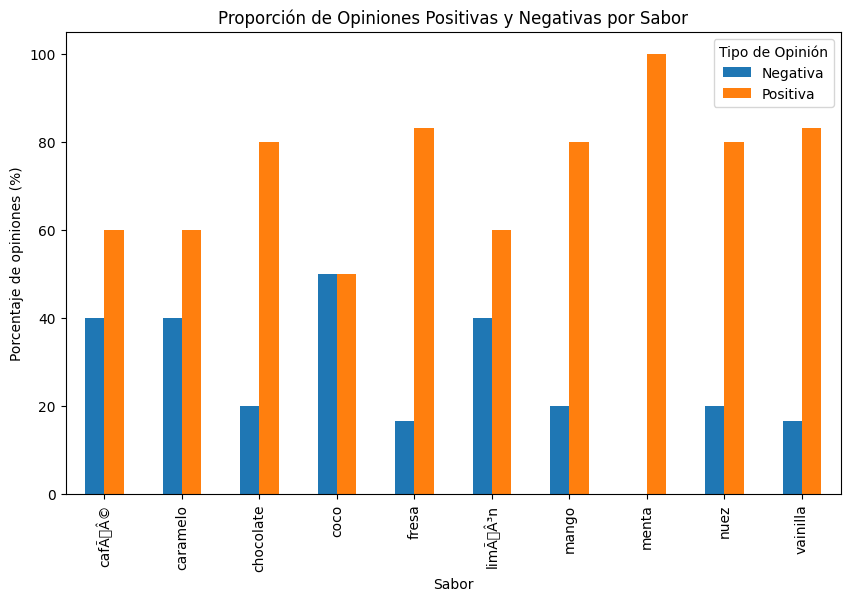

In [64]:
# -------------------------------
# 9. Nuevo gráfico: Proporción de opiniones positivas y negativas por cada sabor
# -------------------------------
# Contamos el número de reseñas positivas y negativas por sabor
conteos = df_test.groupby(["sabor", "prediccion"]).size().reset_index(name="conteo")

# Convertir a pivot table para tener columnas separadas para positivas y negativas
pivot = conteos.pivot(index="sabor", columns="prediccion", values="conteo").fillna(0)

# Renombramos las columnas: 0 -> 'Negativa', 1 -> 'Positiva'
pivot = pivot.rename(columns={0: "Negativa", 1: "Positiva"})

# Calcular el porcentaje en lugar del conteo
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100
print("\nPorcentaje de opiniones por sabor:")
print(pivot_pct)

# Graficar un diagrama de barras agrupadas
pivot_pct.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sabor')
plt.ylabel('Porcentaje de opiniones (%)')
plt.title('Proporción de Opiniones Positivas y Negativas por Sabor')
plt.legend(title="Tipo de Opinión")
plt.show()

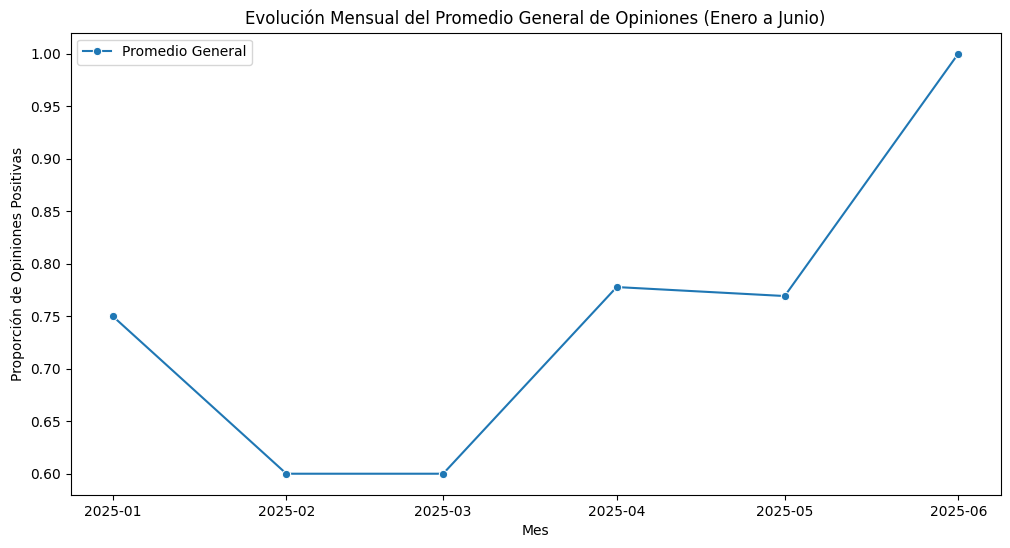

In [67]:
# -------------------------------
# 9. Gráfico: Evolución mensual de las opiniones generales y el desglose de positivos y negativos (enero a junio)
# -------------------------------
# Extraer el mes de la columna 'fecha'
df_test['mes'] = df_test['fecha'].dt.to_period('M').dt.to_timestamp()

# A. Promedio general de opiniones por mes (todos los sabores combinados)
promedio_mes = df_test.groupby('mes')['prediccion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='prediccion', data=promedio_mes, marker='o', label='Promedio General')
plt.xlabel("Mes")
plt.ylabel("Proporción de Opiniones Positivas")
plt.title("Evolución Mensual del Promedio General de Opiniones (Enero a Junio)")
plt.xticks(promedio_mes['mes'], [mes.strftime("%Y-%m") for mes in promedio_mes['mes']])
plt.legend()
plt.show()




Porcentaje de opiniones por mes:
prediccion   Negativa    Positiva
mes                              
2025-01-01  25.000000   75.000000
2025-02-01  40.000000   60.000000
2025-03-01  40.000000   60.000000
2025-04-01  22.222222   77.777778
2025-05-01  23.076923   76.923077
2025-06-01   0.000000  100.000000


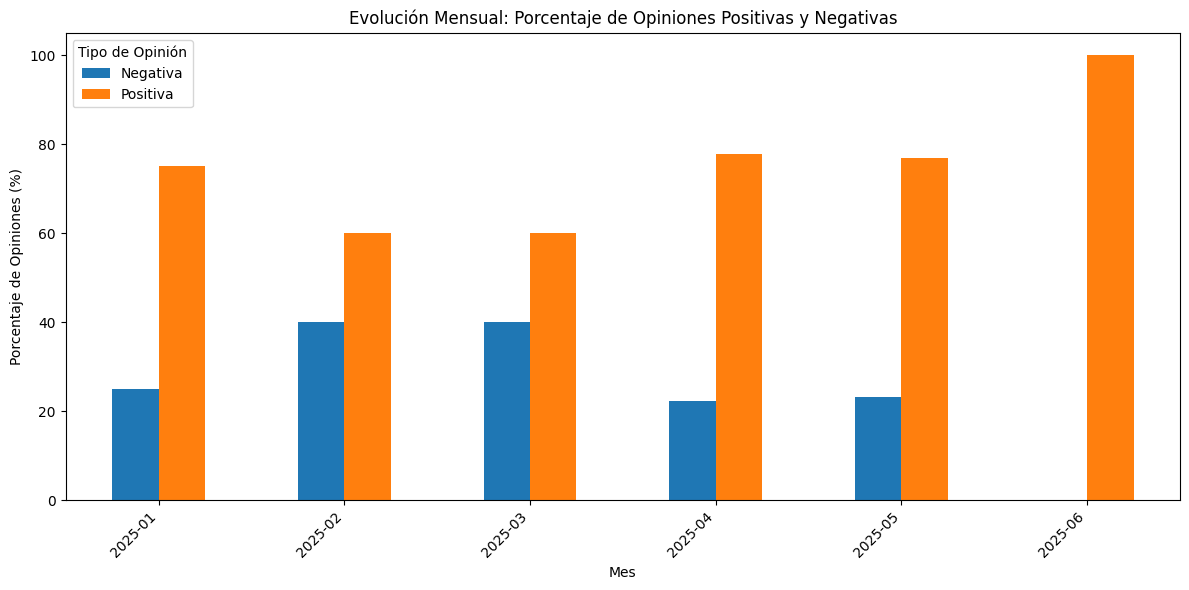

In [68]:
# B. Desglose por positivos y negativos por mes
# Contamos el número de reseñas positivas y negativas en cada mes
conteos_mes = df_test.groupby(['mes', 'prediccion']).size().reset_index(name="conteo")
pivot_mes = conteos_mes.pivot(index='mes', columns='prediccion', values='conteo').fillna(0)
pivot_mes = pivot_mes.rename(columns={0: "Negativa", 1: "Positiva"})

# Calcular el porcentaje de cada tipo por mes
pivot_mes_pct = pivot_mes.div(pivot_mes.sum(axis=1), axis=0) * 100
print("\nPorcentaje de opiniones por mes:")
print(pivot_mes_pct)

pivot_mes_pct.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mes')
plt.ylabel('Porcentaje de Opiniones (%)')
plt.title('Evolución Mensual: Porcentaje de Opiniones Positivas y Negativas')
ticks = plt.xticks()[0]  # Obtener las posiciones actuales de los ticks
plt.xticks(ticks, labels=[mes.strftime("%Y-%m") for mes in pivot_mes_pct.index], rotation=45, ha="right")
plt.legend(title="Tipo de Opinión")
plt.tight_layout()
plt.show()